# Анализ заказанных выписок

Импортируем необходимый модули

In [75]:
import os
import json
import datetime

import pandas as pd
import matplotlib.pyplot as plt

Объявляем переменные (константы)

In [76]:
DATA_DIR = 'data'

## Загружаем данные

In [116]:
data = []

for filename in os.listdir(DATA_DIR):
    data.append(json.load(open(os.path.join(DATA_DIR, filename))))

In [117]:
data = pd.DataFrame(data)

Оставим только интересуюшие данные

In [118]:
data = data[['id', 'cadnum', 'foreign_id', 'inserted', 'updated', 'state', 'error_message']].copy()

Преобразуем столбцы даты в datetime

In [119]:
data['inserted'] = pd.to_datetime(data['inserted'])
data['updated'] = pd.to_datetime(data['updated'])

In [120]:
data['execution_time'] = data['updated'] - data['inserted']

In [121]:
data

,id,cadnum,foreign_id,inserted,updated,state,error_message,execution_time
0,77,50:28:0110223:1434,80-153000553,2020-09-06 13:57:20.185641,2020-09-06 14:12:14.108840,error,NaN,0 days 00:14:53.923199
1,82,50:32:0080209:1183,None,2020-09-06 14:44:53.661722,2020-09-06 15:22:42.921085,error,NaN,0 days 00:37:49.259363
2,83,50:34:0010221:198,None,2020-09-06 14:44:53.715479,2020-09-06 15:24:39.467266,error,NaN,0 days 00:39:45.751787
3,76,50:07:0030307:516,None,2020-09-06 13:57:20.167561,2020-09-06 14:10:16.533836,error,NaN,0 days 00:12:56.366275
4,71,50:26:0110605:1103,None,2020-09-06 12:06:52.542976,2020-09-06 12:13:54.709214,error,NaN,0 days 00:07:02.166238
5,67,50:27:0020450:478,80-151266146,2020-08-22 22:57:31.120100,2020-08-22 23:04:58.402475,added,NaN,0 days 00:07:27.282375
6,66,50:31:0060253:465,None,2020-08-22 22:57:31.096490,2020-08-22 23:03:07.779225,error,NaN,0 days 00:05:36.682735
7,70,50:23:0020115:12756,None,2020-09-06 12:06:52.522507,2020-09-06 12:11:42.466345,error,NaN,0 days 00:04:49.943838
8,69,50:04:0010350:82,80-152994728,2020-09-06 12:06:52.463890,2020-09-06 12:08:14.142754,added,NaN,0 days 00:01:21.678864
9,65,50:08:0060319:707,None,2020-08-22 22:57:31.073431,2020-08-22 23:00:41.202022,error,NaN,0 days 00:03:10.128591


## Визуализируем резултат

### 6.09.20 16.30

In [122]:
data1 = data[data['inserted'] < datetime.datetime(2020, 9, 6, 12, 30)]

#### Соотношение добавленных/ошибок

<AxesSubplot:ylabel='state'>

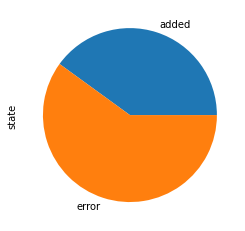

In [123]:
data1.groupby(['state'])['state'].count().plot.pie()

#### Время выполнения задачи

Среднее время выполнения

In [124]:
data1['execution_time'].sum() / len(data1)

Timedelta('0 days 00:07:32.721230100')

Максимальное время выполнения

In [125]:
data1['execution_time'].max()

Timedelta('0 days 00:18:26.062930')

Минимальное время выполнения

In [126]:
data1['execution_time'].min()

Timedelta('0 days 00:01:21.678864')

Распределение 

<AxesSubplot:xlabel='execution_time'>

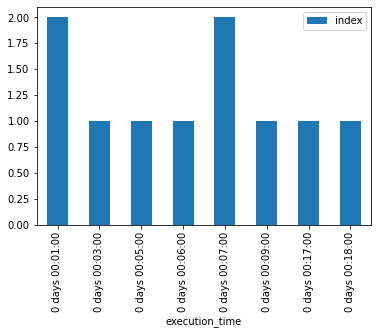

In [127]:
data1['execution_time'].round('min').reset_index().groupby('execution_time').count().plot.bar()

## 6.09.20 17:30

In [128]:
data2 = data[(data['inserted'] > datetime.datetime(2020, 9, 6, 12, 30)) & 
             (data['inserted'] < datetime.datetime(2020, 9, 6, 13, 58))]
data2

,id,cadnum,foreign_id,inserted,updated,state,error_message,execution_time
0,77,50:28:0110223:1434,80-153000553,2020-09-06 13:57:20.185641,2020-09-06 14:12:14.108840,error,NaN,0 days 00:14:53.923199
3,76,50:07:0030307:516,None,2020-09-06 13:57:20.167561,2020-09-06 14:10:16.533836,error,NaN,0 days 00:12:56.366275
14,75,50:18:0090517:458,None,2020-09-06 13:57:20.146720,2020-09-06 14:08:16.100019,error,NaN,0 days 00:10:55.953299
17,78,50:13:0040308:95,None,2020-09-06 13:57:20.207406,2020-09-06 14:14:03.132066,error,NaN,0 days 00:16:42.924660
19,74,50:37:0040140:231,80-152999915,2020-09-06 13:57:20.059523,2020-09-06 13:58:41.352574,error,NaN,0 days 00:01:21.293051


**Данные data2 запускались с опечаткой в коде**

## 6.09.20 18:30

In [132]:
data3 = data[(data['inserted'] > datetime.datetime(2020, 9, 6, 13, 58)) & 
             (data['inserted'] < datetime.datetime(2020, 9, 6, 15, 30))]
data3

,id,cadnum,foreign_id,inserted,updated,state,error_message,execution_time
1,82,50:32:0080209:1183,None,2020-09-06 14:44:53.661722,2020-09-06 15:22:42.921085,error,NaN,0 days 00:37:49.259363
2,83,50:34:0010221:198,None,2020-09-06 14:44:53.715479,2020-09-06 15:24:39.467266,error,NaN,0 days 00:39:45.751787
15,80,50:19:0040316:92,None,2020-09-06 14:44:53.581846,2020-09-06 15:03:42.429250,error,NaN,0 days 00:18:48.847404
16,79,50:04:0230516:329,None,2020-09-06 14:44:53.528191,2020-09-06 14:54:17.571561,error,NaN,0 days 00:09:24.043370
18,81,50:35:0030201:398,None,2020-09-06 14:44:53.621878,2020-09-06 15:13:08.193843,error,NaN,0 days 00:28:14.571965
